# Step 0. Parameter Setting & User Authentication

In [1]:
import dtnmonitor as dtn
import utilities as util
import os

username="peggy.lu@northwestern.edu"
passwd="1234"
date="20170828"
simu_starttime="00"  #00  06  12  18
folder="NOAA"
graph_mode=1  #0 all, 1 100pt
band=277  #47:absolute_vorticity_isobaric   315: temperature_pressure_difference_layer  49:geopotential_height_isobaric
#authentication
util.authenticate(username,passwd)

ImportError: No module named 'utilities'

# Step 1. Download original grib2 data

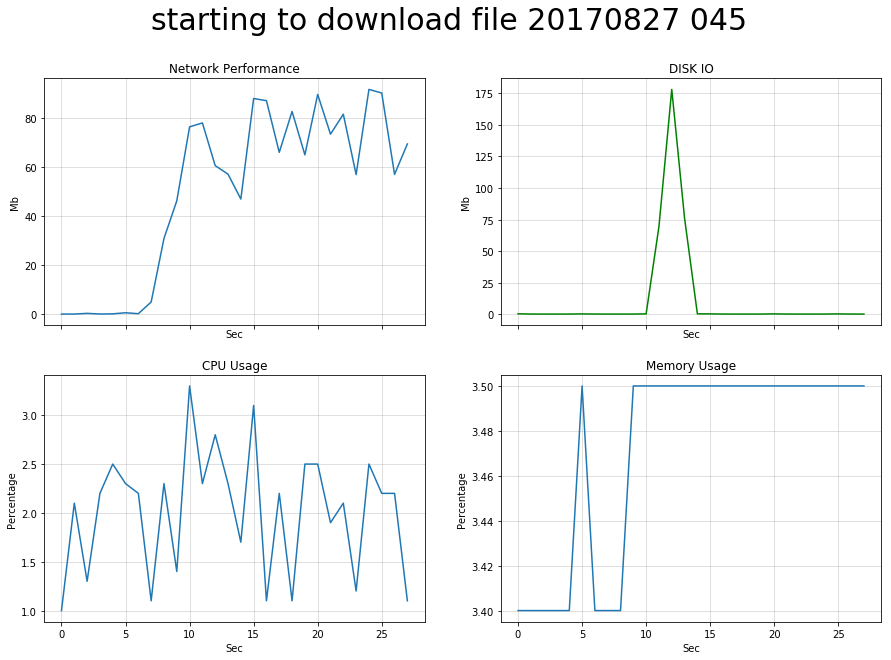

None

In [17]:
#download
dtn.exec_command(date,simu_starttime,folder,graph_mode)


# Step 2. Convert grib2 to image

In [43]:

output_directory=folder+"/"+date+"_"+simu_starttime
origin_folder = output_directory+"/grib2"
#convert grib2 to netCDF
netcdf_folder =output_directory+"/nc"
util.mkdir_p(netcdf_folder)
util.rm_file_in_folder(netcdf_folder)
#convert nc to png
img_folder =output_directory+"/image"
util.mkdir_p(img_folder)
util.rm_file_in_folder(img_folder)
for dirname, dirnames, filenames in os.walk(origin_folder):
    # print path to all filenames.
    isFirst=True
    myFirstfile = "null"
    for filename in sorted(filenames):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))       
        if filename.endswith(".grib2"):         

            filename_noext=os.path.splitext(filename)[0]
            print("convert "+filename_noext+" to netCDF...")
            output_netCDF=filename_noext+".nc"
            gdal_command = "gdal_translate -b "+str(band)+" -of netCDF "+origin_folder+"/" +filename+" "+netcdf_folder+"/"+output_netCDF
            util.execute(gdal_command)

            if os.path.isfile(netcdf_folder+"/"+output_netCDF):
                print("convert "+filename_noext+" to image...")
                output_png=filename_noext+".png"
                util.plot(netcdf_folder+"/"+output_netCDF,myFirstfile,img_folder+"/"+output_png)
                if isFirst:
                    myFirstfile=netcdf_folder+"/"+output_netCDF
                    isFirst=False
            else:
                print("nc file does not exist")


           
           

convert gfs.0p25.2017082200.f000 to netCDF...
Input file size is 1440, 721
convert gfs.0p25.2017082200.f000 to image...
convert gfs.0p25.2017082206.f000 to netCDF...
Input file size is 1440, 721
convert gfs.0p25.2017082206.f000 to image...
convert gfs.0p25.2017082212.f000 to netCDF...
Input file size is 1440, 721
convert gfs.0p25.2017082212.f000 to image...
convert gfs.0p25.2017082218.f000 to netCDF...
Input file size is 1440, 721
convert gfs.0p25.2017082218.f000 to image...
convert gfs.0p25.2017082300.f000 to netCDF...
Input file size is 1440, 721
convert gfs.0p25.2017082300.f000 to image...
convert gfs.0p25.2017082306.f000 to netCDF...
Input file size is 1440, 721
convert gfs.0p25.2017082306.f000 to image...
convert gfs.0p25.2017082312.f000 to netCDF...
Input file size is 1440, 721
convert gfs.0p25.2017082312.f000 to image...
convert gfs.0p25.2017082318.f000 to netCDF...
Input file size is 1440, 721
convert gfs.0p25.2017082318.f000 to image...
convert gfs.0p25.2017082400.f000 to netC

# Step 3. Convert image to video

In [44]:
#convert png to video
#ffmpeg -r 1 -i $IMAGE_FOLDER/gfs.0p25.$DATE$i.f%*.png  -vcodec mpeg4 -y $VIDEO_FOLDER/${DATE}_$i.mp4"
output_video = output_directory+"/"+date+"_"+simu_starttime+".mp4"
video_command = "ffmpeg -r 1 -i "+img_folder+"/gfs.0p25."+date+simu_starttime+".f%*.png -vf 'scale=trunc(iw/2)*2:trunc(ih/2)*2' -vcodec libx264 -pix_fmt yuv420p -y "+output_video
print(video_command)
util.execute(video_command)

ffmpeg -r 1 -i NOAA/20170822_00/image/gfs.0p25.2017082200.f%*.png -vf 'scale=trunc(iw/2)*2:trunc(ih/2)*2' -vcodec libx264 -pix_fmt yuv420p -y NOAA/20170822_00/20170822_00.mp4
ffmpeg version git-2017-01-22-f1214ad Copyright (c) 2000-2017 the FFmpeg developers


In [45]:
#convert png to video
#ffmpeg -r 1 -i $IMAGE_FOLDER/gfs.0p25.$DATE$i.f%*.png  -vcodec mpeg4 -y $VIDEO_FOLDER/${DATE}_$i.mp4"
output_video = output_directory+"/"+date+"_"+simu_starttime+".mp4"
video_command = "ffmpeg -r 1 -i "+img_folder+"/gfs.0p25.2017082%*.f000.png -vf 'scale=trunc(iw/2)*2:trunc(ih/2)*2' -vcodec libx264 -pix_fmt yuv420p -y "+output_video
print(video_command)
util.execute(video_command)

ffmpeg -r 1 -i NOAA/20170822_00/image/gfs.0p25.2017082%*.f000.png -vf 'scale=trunc(iw/2)*2:trunc(ih/2)*2' -vcodec libx264 -pix_fmt yuv420p -y NOAA/20170822_00/20170822_00.mp4
ffmpeg version git-2017-01-22-f1214ad Copyright (c) 2000-2017 the FFmpeg developers


# Step 4. show video

In [46]:
#show video
import io
import base64
from IPython.display import HTML

video = io.open(output_video, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type='video/mp4; codecs="avc1.42E01E, mp4a.40.2"'" />
             </video>'''.format(encoded.decode('ascii')))